## Loading Dataset

In [1]:
import pandas as pd 
df=pd.read_csv("global_internet_adoption.csv")

## Shape of Dataset

In [2]:
rows,columns=df.shape
print(rows,columns)

56400 14


## Datatypes of Column

In [3]:
df.dtypes

Country                        object
Date                           object
Internet_Penetration (%)      float64
Broadband_Speed (Mbps)        float64
GDP_Per_Capita (USD)          float64
Education_Level (%)           float64
Mobile_Data_Usage (GB)        float64
Digital_Investment (M USD)    float64
Digital_Literacy (%)          float64
X_Sentiment_Score             float64
5G_Rollout                      int64
Urban_Rural                    object
Latitude                      float64
Longitude                     float64
dtype: object

In [4]:
df.tail(10)

,Country,Date,Internet_Penetration (%),Broadband_Speed (Mbps),GDP_Per_Capita (USD),Education_Level (%),Mobile_Data_Usage (GB),Digital_Investment (M USD),Digital_Literacy (%),X_Sentiment_Score,5G_Rollout,Urban_Rural,Latitude,Longitude
56390,South Africa,6/1/2025,100.00,111.35,18072.21,48.64,10.16,1648.37,74.18,0.27,1,Urban,-30.5595,22.9375
56391,South Africa,6/2/2025,97.04,111.25,18084.85,48.13,10.31,1623.59,73.99,0.11,1,Urban,-30.5595,22.9375
56392,South Africa,6/3/2025,52.37,59.99,18111.62,48.37,5.49,1658.81,74.45,0.02,1,Rural,-30.5595,22.9375
56393,South Africa,6/4/2025,52.87,59.92,18075.69,48.37,5.43,1651.66,73.95,0.43,1,Rural,-30.5595,22.9375
56394,South Africa,6/5/2025,52.38,59.96,18086.15,48.19,5.47,1643.24,74.46,-0.75,1,Rural,-30.5595,22.9375
56395,South Africa,6/6/2025,52.61,59.97,18076.49,48.49,5.44,1649.26,74.30,-0.52,1,Rural,-30.5595,22.9375
56396,South Africa,6/7/2025,97.50,111.40,18078.04,48.25,10.29,1640.56,73.82,0.67,1,Urban,-30.5595,22.9375
56397,South Africa,6/8/2025,100.00,111.47,18127.41,47.96,10.22,1647.83,74.11,0.55,1,Urban,-30.5595,22.9375
56398,South Africa,6/9/2025,97.37,111.48,18070.01,47.87,10.16,1650.88,74.25,-0.62,1,Urban,-30.5595,22.9375
56399,South Africa,6/10/2025,97.58,111.53,18080.40,48.43,10.25,1624.51,74.04,-0.64,1,Urban,-30.5595,22.9375


## Checking Null Values

In [5]:
df.isnull().sum()

Country                       0
Date                          0
Internet_Penetration (%)      0
Broadband_Speed (Mbps)        0
GDP_Per_Capita (USD)          0
Education_Level (%)           0
Mobile_Data_Usage (GB)        0
Digital_Investment (M USD)    0
Digital_Literacy (%)          0
X_Sentiment_Score             0
5G_Rollout                    0
Urban_Rural                   0
Latitude                      0
Longitude                     0
dtype: int64

## Checking unique values to find out categorical columns

In [6]:
df.nunique()

Country                          10
Date                           5640
Internet_Penetration (%)       6338
Broadband_Speed (Mbps)        13064
GDP_Per_Capita (USD)          55540
Education_Level (%)            7130
Mobile_Data_Usage (GB)         1098
Digital_Investment (M USD)    48945
Digital_Literacy (%)           6656
X_Sentiment_Score               201
5G_Rollout                        2
Urban_Rural                       2
Latitude                         10
Longitude                        10
dtype: int64

## Chcecking Duplicate Columns

In [7]:
df.duplicated().sum()

np.int64(0)

## Making year column to find yearly trend

In [8]:
df['Date'] = pd.to_datetime(df['Date'])
df['Year'] = df['Date'].dt.year


## Exploratory Data Analysis

## Global Internet Growth over past years

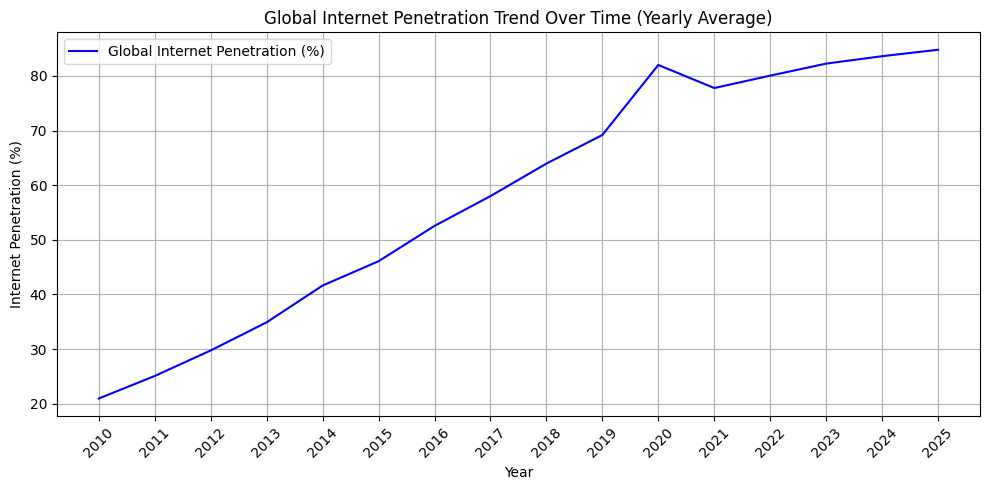

In [9]:
import matplotlib.pyplot as plt
yearly_avg = df.groupby("Year")["Internet_Penetration (%)"].mean()
plt.figure(figsize=(10, 5))
plt.plot(yearly_avg.index, yearly_avg.values, label="Global Internet Penetration (%)", color="blue")
plt.title("Global Internet Penetration Trend Over Time (Yearly Average)")
plt.xlabel("Year")
plt.ylabel("Internet Penetration (%)")
plt.grid(True)
plt.legend()
plt.xticks(ticks=yearly_avg.index, rotation=45)
plt.tight_layout()
plt.show()

## Top 10 COuntries by Internet Penetration

Text(0.5, 1.0, 'Mean Internet Penetration Rate by Country')

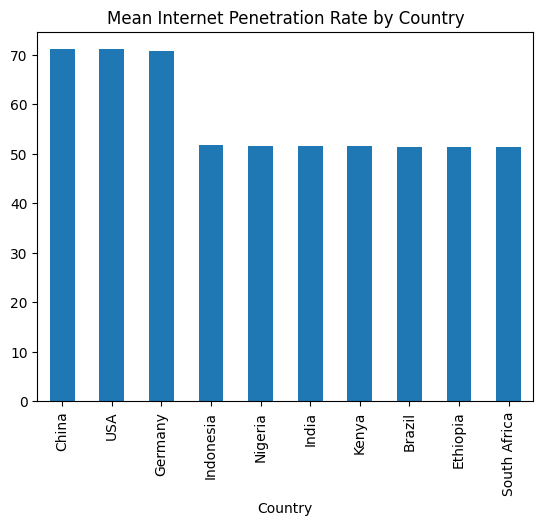

In [10]:
import matplotlib.pyplot as plt
df.groupby("Country")["Internet_Penetration (%)"].mean().sort_values(ascending=False).head(10).plot(kind="bar")
plt.title("Mean Internet Penetration Rate by Country")

## Boxplots of Internet_Penetration,Broadband Speed, Mobile Data Usage to check if outliers exist

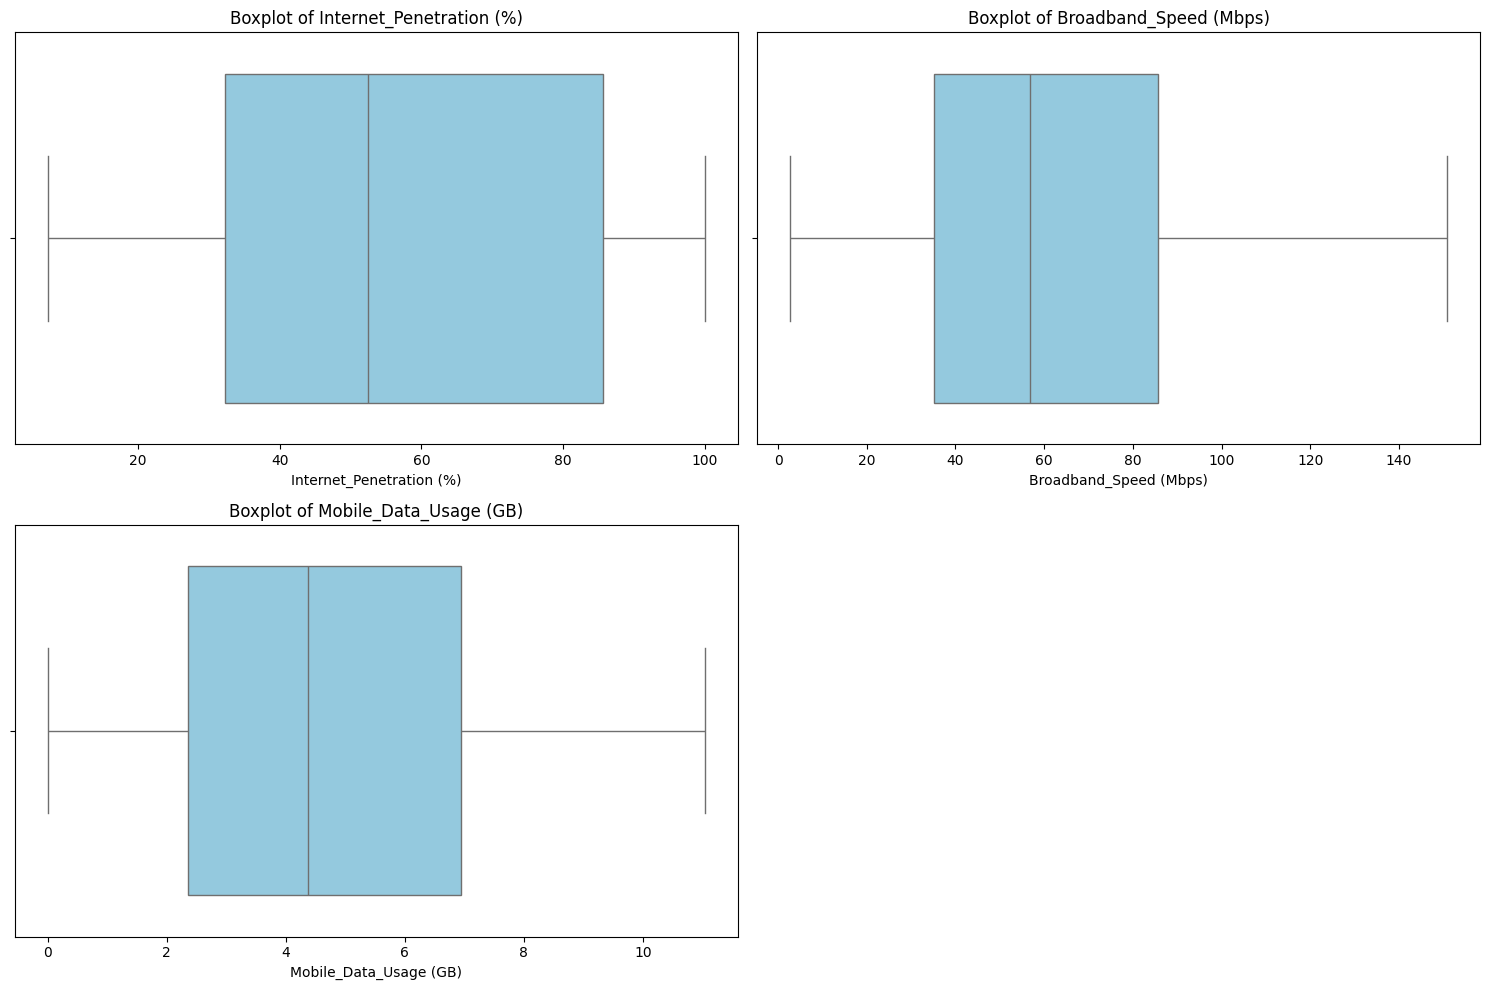

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns
cols_to_plot = ['Internet_Penetration (%)',
                'Broadband_Speed (Mbps)', 'Mobile_Data_Usage (GB)']
plt.figure(figsize=(15, 10))
for i, col in enumerate(cols_to_plot):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x=df[col], color='skyblue')
    plt.title(f'Boxplot of {col}')
    plt.xlabel(col)

plt.tight_layout()
plt.show()



## Percent of 5G access

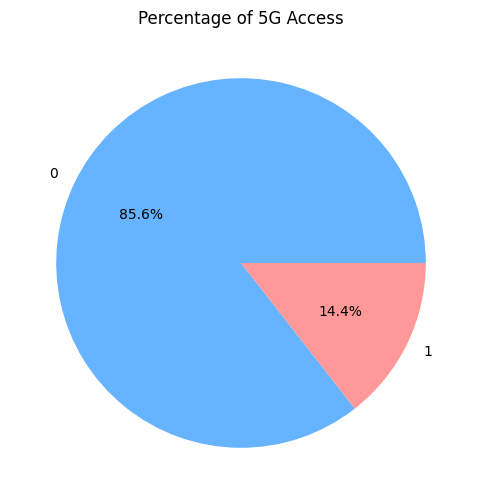

In [12]:
import matplotlib.pyplot as plt

# Count values
access_counts = df["5G_Rollout"].value_counts()

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(access_counts, labels=access_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'])
plt.title("Percentage of 5G Access")
plt.show()


## Urban vs Rural Access of Internet Services

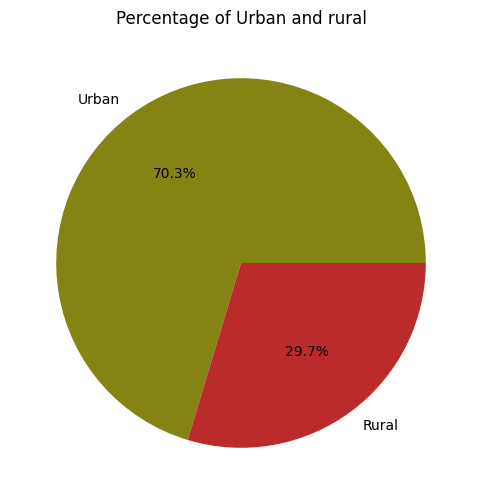

In [13]:
import matplotlib.pyplot as plt

# Count values
access_counts = df["Urban_Rural"].value_counts()

# Pie Chart
plt.figure(figsize=(6, 6))
plt.pie(access_counts, labels=access_counts.index, autopct='%1.1f%%', colors=["#858313", "#bc2b2b"])
plt.title("Percentage of Urban and rural")
plt.show()


## Ranking of Countries by Digital Investment

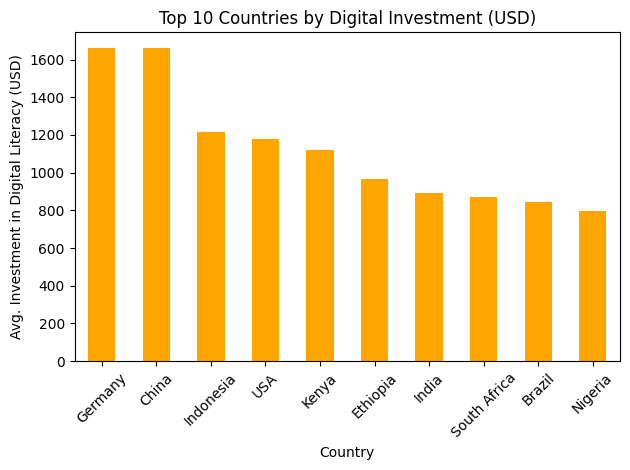

In [14]:
import matplotlib.pyplot as plt

# Group and calculate average investment per country
avg_investment = df.groupby("Country")["Digital_Investment (M USD)"].mean().sort_values(ascending=False)

# Plot top 10 countries by investment
avg_investment.head(10).plot(kind="bar", color="orange")

plt.title("Top 10 Countries by Digital Investment (USD)")
plt.xlabel("Country")
plt.ylabel("Avg. Investment in Digital Literacy (USD)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()




## Ranking of Countries by Digital Literacy

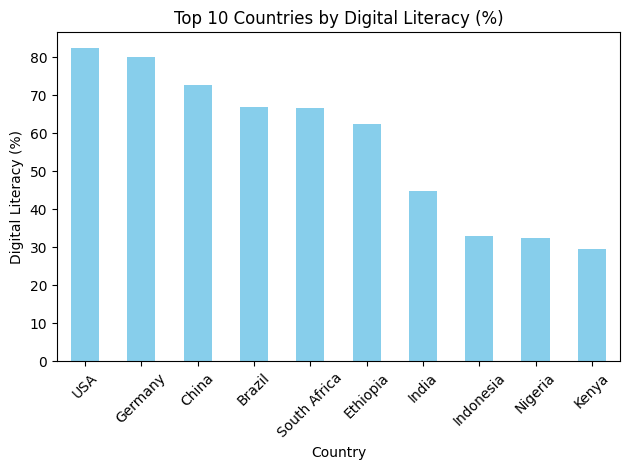

In [15]:
import matplotlib.pyplot as plt

avg_digital_lit = df.groupby("Country")["Digital_Literacy (%)"].mean().sort_values(ascending=False)

# Plot top 10 countries with highest digital literacy
avg_digital_lit.head(10).plot(kind="bar", color="skyblue")

plt.title("Top 10 Countries by Digital Literacy (%)")
plt.xlabel("Country")
plt.ylabel("Digital Literacy (%)")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Public Sentiment Toward Internet

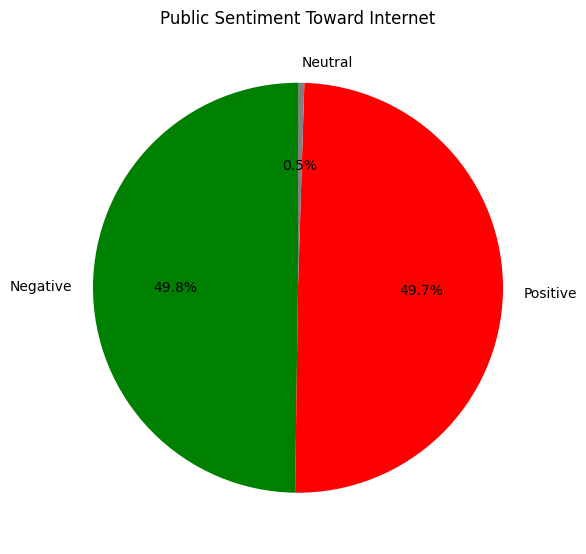

In [16]:
import matplotlib.pyplot as plt

# Create sentiment categories
df["Sentiment"] = df["X_Sentiment_Score"].apply(
    lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral")
)

# Count each sentiment
sentiment_counts = df["Sentiment"].value_counts()

# Pie chart
plt.figure(figsize=(6, 6))
colors = ["green", "red", "gray"]
sentiment_counts.plot(kind="pie", autopct="%1.1f%%", startangle=90, colors=colors)
plt.title("Public Sentiment Toward Internet")
plt.ylabel("")  # Hide y-axis label
plt.tight_layout()
plt.show()


## Education level in countries with respect to GDP 

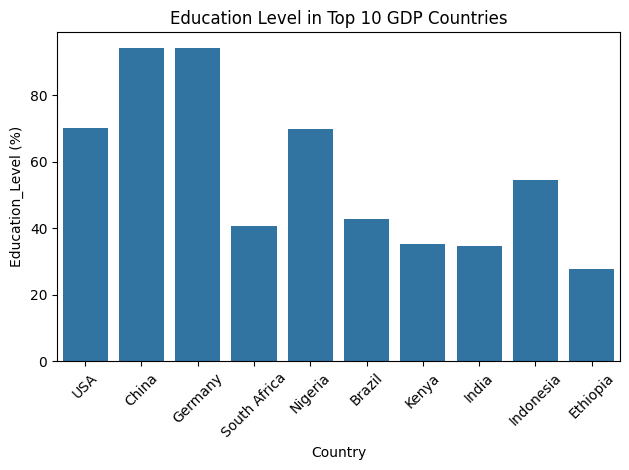

In [17]:
df_country = df.groupby('Country')[['GDP_Per_Capita (USD)', 'Education_Level (%)']].mean().reset_index()

sns.barplot(data=df_country.sort_values('GDP_Per_Capita (USD)', ascending=False).head(10),
            x='Country', y='Education_Level (%)')
plt.title("Education Level in Top 10 GDP Countries")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


## Heatmap to find Correlation between Numeric Features

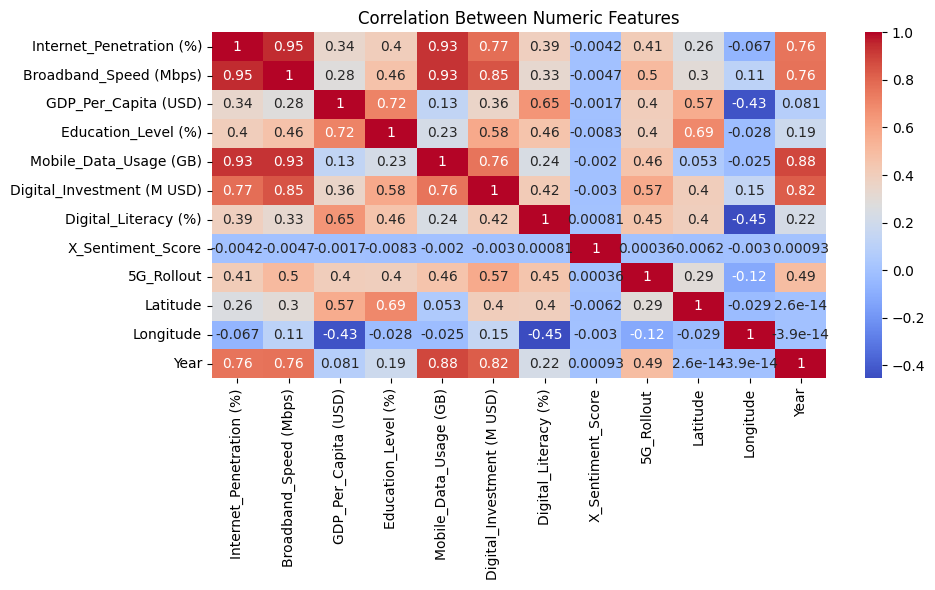

In [18]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
sns.heatmap(df.corr(numeric_only=True), annot=True, cmap="coolwarm")
plt.title("Correlation Between Numeric Features")
plt.tight_layout()
plt.show()
#this tells us Countries with faster internet tend to have higher internet access.
#Where broadband is faster, people use more mobile data
#Higher GDP = more digital skills.
#More digital investment is linked to higher data use.
##Weak Correlation
#People's feelings about the internet do not strongly depend on speed, literacy, or investment.
#Investment, speed, usage, and literacy are strongly interconnected.
#Year is positively correlated with everything digital — shows global digital progress over time

### Concusions From EDA

### 🌍 Global Trends
- **China, USA, and Germany** have the highest average internet penetration rates, reflecting widespread digital connectivity.
- **Germany and China** lead in **digital investment**, showing strategic efforts to enhance technological infrastructure.
- **USA and Germany** are among the top countries for **digital literacy**, indicating strong educational and digital skill systems.
- **Public sentiment** toward the internet is mixed and **does not strongly correlate** with internet speed, investment, or literacy.
- **5G rollout adoption** is still uneven globally — some countries show high adoption rates while others lag significantly.
- **Urban areas** consistently show higher internet access compared to **rural regions**, highlighting infrastructure disparities.

### 📈 Observed Relationships
- Countries with **faster internet connections** tend to have **higher internet access**.
- Where **broadband is faster**, people tend to **use more mobile data**.
- A **higher GDP per capita** is associated with **better digital skills** and literacy levels.
- Greater **digital investment** is linked with **higher data usage**, indicating more online activity.
- **Digital investment, speed, usage, and literacy** are strongly interconnected — improvements in one often influence the others.

### 📅 Time-Based Patterns
- The variable **Year** is **positively correlated** with nearly all digital indicators.
- This reflects the clear **global progress in internet adoption** and digital infrastructure over time.

### 🧠 Extra Commentary
- **Visualizations and tables** confirm how digital transformation has been uneven across countries.
- High-income countries are **far more digitally advanced**, while others still show gaps in infrastructure and skills.
- While investment and speed drive internet use, **people’s opinions (sentiment)** toward the internet are **more nuanced** and not directly tied to those factors.
"""

Preprocessing of Data

In [19]:
df.rename(columns={
    "GDP_Per_Capita (USD)": "GDP_Per_Capita",
    "Digital_Investment (M USD)": "Digital_Investment",
    "Internet_Penetration (%)": "Internet_Penetration",
    "Digital_Literacy (%)": "Digital_Literacy",
    "Education_Level (%)": "Education_Level",
    "Broadband_Speed (Mbps)":"Broadband_Speed",
    "Mobile_Data_Usage (GB)":"Mobile_Data_Usage",
    "Urban_Rural": "Location_Type",
    "X_Sentiment_Score": "Public_Internet_Feedback"
}, inplace=True)
df.head()

,Country,Date,Internet_Penetration,Broadband_Speed,GDP_Per_Capita,Education_Level,Mobile_Data_Usage,Digital_Investment,Digital_Literacy,Public_Internet_Feedback,5G_Rollout,Location_Type,Latitude,Longitude,Year,Sentiment
0,USA,2010-01-01,46.78,23.77,40589.92,61.93,0.79,401.68,74.56,-0.42,0,Urban,37.0902,-95.7129,2010,Negative
1,USA,2010-01-02,46.92,23.70,40509.60,62.11,0.83,410.09,74.31,-0.58,0,Urban,37.0902,-95.7129,2010,Negative
2,USA,2010-01-03,46.99,23.78,40548.95,62.40,0.85,416.53,74.63,-0.38,0,Urban,37.0902,-95.7129,2010,Negative
3,USA,2010-01-04,46.91,23.78,40551.20,62.40,0.84,401.89,75.11,-0.25,0,Urban,37.0902,-95.7129,2010,Negative
4,USA,2010-01-05,47.33,23.82,40517.10,62.50,0.84,401.98,74.54,1.00,0,Urban,37.0902,-95.7129,2010,Positive


## Encoding Categorical Data

In [20]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
df['Location_Type'] = le.fit_transform(df['Location_Type'])
df["5G_Rollout"] = le.fit_transform(df["5G_Rollout"])  # Urban → 1, Rural → 0

df.head()

,Country,Date,Internet_Penetration,Broadband_Speed,GDP_Per_Capita,Education_Level,Mobile_Data_Usage,Digital_Investment,Digital_Literacy,Public_Internet_Feedback,5G_Rollout,Location_Type,Latitude,Longitude,Year,Sentiment
0,USA,2010-01-01,46.78,23.77,40589.92,61.93,0.79,401.68,74.56,-0.42,0,1,37.0902,-95.7129,2010,Negative
1,USA,2010-01-02,46.92,23.70,40509.60,62.11,0.83,410.09,74.31,-0.58,0,1,37.0902,-95.7129,2010,Negative
2,USA,2010-01-03,46.99,23.78,40548.95,62.40,0.85,416.53,74.63,-0.38,0,1,37.0902,-95.7129,2010,Negative
3,USA,2010-01-04,46.91,23.78,40551.20,62.40,0.84,401.89,75.11,-0.25,0,1,37.0902,-95.7129,2010,Negative
4,USA,2010-01-05,47.33,23.82,40517.10,62.50,0.84,401.98,74.54,1.00,0,1,37.0902,-95.7129,2010,Positive


## Feature and Target Seperation

In [21]:
X = df[["GDP_Per_Capita", "Education_Level", "Digital_Investment",
        "Digital_Literacy", "5G_Rollout", "Location_Type"]]
y = df["Internet_Penetration"]

## Train and Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Scaling of Data

In [23]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
numeric_cols = ["GDP_Per_Capita", "Education_Level", "Digital_Investment", "Digital_Literacy"]

X_train[numeric_cols] = scaler.fit_transform(X_train[numeric_cols])
X_test[numeric_cols] = scaler.transform(X_test[numeric_cols])

In [24]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score, mean_absolute_error
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

    # Predictions
y_pred = model.predict(X_test)

    # Metrics
r2 = r2_score(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
print(r2,mae)

0.9972486212524909 0.7148086613475179


## Streamlit App

## Run it on Browser

In [ ]:
import streamlit as st
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import r2_score, mean_absolute_error

# Page setup


# Custom styling
def set_custom_style():
    st.markdown("""
    <style>
    .stApp {
        background-image: linear-gradient(to bottom right, #4a90e2, #50c878); /* Updated to mixture of blue and green */
        background-size: cover;
        background-attachment: fixed;
        color: #1c2526;
        font-family: 'Arial', sans-serif;
    }

    /* Main container styling */
    .main-container {
        background-color: rgba(255, 255, 255, 0.85);
        border-radius: 15px;
        padding: 2rem;
        margin: 1rem;
        box-shadow: 0 4px 12px rgba(0, 0, 0, 0.1);
        transition: transform 0.3s ease;
    }

    .main-container:hover {
        transform: translateY(-5px);
    }

    /* Sidebar styling */
    .css-1d391kg, .css-1lcbmhc {
        background-color: rgba(0, 71, 171, 0.9);
        color: white;
        border-radius: 10px;
        padding: 1rem;
    }

    /* Headers */
    h1, h2, h3 {
        color: #004aad;
        font-weight: bold;
        text-shadow: 1px 1px 2px rgba(0, 0, 0, 0.1);
    }

    /* Interactive buttons */
    .stButton>button {
        background-color: #004aad;
        color: white;
        border-radius: 8px;
        padding: 0.5rem 1rem;
        font-size: 16px;
        transition: background-color 0.3s ease;
    }

    .stButton>button:hover {
        background-color: #002a66;
        box-shadow: 0 2px 8px rgba(0, 0, 0, 0.2);
    }

    /* Slider styling */
    .stSlider>div>div>div {
        background-color: #004aad;
        border-radius: 5px;
    }

    /* Plot container */
    .plot-container {
        background-color: rgba(255, 255, 255, 0.95);
        padding: 1rem;
        border-radius: 10px;
        margin-bottom: 1rem;
        box-shadow: 0 2px 6px rgba(0, 0, 0, 0.1);
    }

    /* Markdown text */
    .markdown-text-container {
        font-size: 16px;
        line-height: 1.6;
        color: #333333;
    }

    /* Custom section divider */
    .section-divider {
        border-top: 2px solid #004aad;
        margin: 2rem 0;
    }
    </style>
    """, unsafe_allow_html=True)
set_custom_style()

# Title
st.title("🌐 Global Internet Adoption Dashboard")

# Sidebar for navigation
st.sidebar.title("Navigation")
page = st.sidebar.radio("Go to", ["Exploratory Data Analysis", "Predictive Modeling", "Conclusion"])

# Load Data
@st.cache_data
def load_data():
    try:
        df = pd.read_csv("global_internet_adoption.csv")
        df = df.astype({
            'Country': 'string',
            'Urban_Rural': 'string',
        }, errors='ignore')
        if 'Date' in df.columns:
            df['Date'] = pd.to_datetime(df['Date'], errors='coerce')
            df['Year'] = df['Date'].dt.year.fillna(0).astype(int)
        return df
    except FileNotFoundError:
        st.error("Error: 'global_internet_adoption.csv' not found. Please ensure the file is in the correct directory.")
        return None

df = load_data()
if df is None:
    st.stop()

# Exploratory Data Analysis
if page == "Exploratory Data Analysis":
    st.markdown('<div class="main-container">', unsafe_allow_html=True)
    st.subheader("Exploratory Data Analysis Dashboard")
    
    # Data Preview
    st.markdown("### 🔍 Data Preview")
    st.dataframe(df.head(), use_container_width=True)

    # Dataset Info
    st.markdown("### 📌 Dataset Info")
    st.write("Shape of dataset:", df.shape)
    st.write("Column types:")
    st.write(df.dtypes)

    # Missing Values
    st.markdown("### 🧼 Missing Values")
    st.write(df.isnull().sum())

    # Summary Stats
    st.markdown("### 📊 Summary Statistics")
    st.write(df.describe())

    # Visualizations: Two graphs side by side
    st.markdown('<div class="plot-container">', unsafe_allow_html=True)
    st.markdown("### 🌐 Internet Penetration Visualizations")
    col1, col2 = st.columns(2)

    with col1:
        st.markdown("#### Global Internet Growth")
        yearly_avg = df.groupby("Year")["Internet_Penetration (%)"].mean()
        fig, ax = plt.subplots(figsize=(6, 4))
        ax.plot(yearly_avg.index, yearly_avg.values, color="#004aad", label="Global Internet Penetration", linewidth=2)
        ax.set_title("Global Internet Penetration Trend", fontsize=12, pad=10)
        ax.set_xlabel("Year")
        ax.set_ylabel("Internet Penetration (%)")
        ax.grid(True, linestyle='--', alpha=0.7)
        ax.legend()
        plt.xticks(rotation=45)
        fig.tight_layout()
        st.pyplot(fig)

    with col2:
        st.markdown("#### Top 10 Countries by Internet Penetration")
        top_10_countries = df.groupby("Country")["Internet_Penetration (%)"].mean().sort_values(ascending=False).head(10)
        fig, ax = plt.subplots(figsize=(6, 4))
        top_10_countries.plot(kind="bar", color="#00a1d6", ax=ax)
        ax.set_ylabel("Internet Penetration (%)")
        ax.set_title("Top 10 Countries", fontsize=12)
        plt.xticks(rotation=45, ha='right')
        fig.tight_layout()
        st.pyplot(fig)
    st.markdown('</div>', unsafe_allow_html=True)

    # 5G Rollout Pie
    st.markdown('<div class="plot-container">', unsafe_allow_html=True)
    st.markdown("### 📶 5G Rollout Status")
    access_counts = df["5G_Rollout"].value_counts()
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.pie(access_counts, labels=access_counts.index, autopct='%1.1f%%', colors=['#66b3ff', '#ff9999'], startangle=90)
    ax.set_title("5G Rollout Distribution")
    st.pyplot(fig)
    st.markdown('</div>', unsafe_allow_html=True)

    # Urban vs Rural
    st.markdown('<div class="plot-container">', unsafe_allow_html=True)
    st.markdown("### 🏡 Urban vs Rural Access")
    access_counts = df["Urban_Rural"].value_counts()
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.pie(access_counts, labels=access_counts.index, autopct='%1.1f%%', colors=["#858313", "#bc2b2b"], startangle=90)
    ax.set_title("Urban vs Rural Access")
    st.pyplot(fig)
    st.markdown('</div>', unsafe_allow_html=True)

    # Digital Investment
    st.markdown('<div class="plot-container">', unsafe_allow_html=True)
    st.markdown("### 💸 Top 10 Countries by Digital Investment")
    avg_investment = df.groupby("Country")["Digital_Investment (M USD)"].mean().sort_values(ascending=False).head(10)
    fig, ax = plt.subplots(figsize=(8, 4))
    avg_investment.plot(kind="bar", color="#ffaa00", ax=ax)
    ax.set_ylabel("Investment (M USD)")
    ax.set_title("Top 10 Countries by Digital Investment", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    fig.tight_layout()
    st.pyplot(fig)
    st.markdown('</div>', unsafe_allow_html=True)

    # Digital Literacy
    st.markdown('<div class="plot-container">', unsafe_allow_html=True)
    st.markdown("### 📚 Top 10 Countries by Digital Literacy")
    avg_lit = df.groupby("Country")["Digital_Literacy (%)"].mean().sort_values(ascending=False).head(10)
    fig, ax = plt.subplots(figsize=(8, 4))
    avg_lit.plot(kind="bar", color="#00c4b4", ax=ax)
    ax.set_ylabel("Digital Literacy (%)")
    ax.set_title("Top 10 Countries by Digital Literacy", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    fig.tight_layout()
    st.pyplot(fig)
    st.markdown('</div>', unsafe_allow_html=True)

    # Sentiment Analysis
    st.markdown('<div class="plot-container">', unsafe_allow_html=True)
    st.markdown("### 🧠 Public Sentiment Toward Internet")
    df["Sentiment"] = df["X_Sentiment_Score"].apply(lambda x: "Positive" if x > 0 else ("Negative" if x < 0 else "Neutral"))
    sentiment_counts = df["Sentiment"].value_counts()
    fig, ax = plt.subplots(figsize=(5, 5))
    ax.pie(sentiment_counts, labels=sentiment_counts.index, autopct="%1.1f%%", startangle=90, colors=["#28a745", "#dc3545", "#6c757d"])
    ax.set_title("Public Sentiment Toward Internet")
    st.pyplot(fig)
    st.markdown('</div>', unsafe_allow_html=True)

    # Education vs GDP
    st.markdown('<div class="plot-container">', unsafe_allow_html=True)
    st.markdown("### 💼 Education Level in Top 10 GDP Countries")
    df_country = df.groupby('Country')[['GDP_Per_Capita (USD)', 'Education_Level (%)']].mean().reset_index()
    top_gdp_countries = df_country.sort_values('GDP_Per_Capita (USD)', ascending=False).head(10)
    fig, ax = plt.subplots(figsize=(8, 4))
    sns.barplot(data=top_gdp_countries, x='Country', y='Education_Level (%)', ax=ax, palette='Blues_d')
    ax.set_title("Education Level in Top 10 GDP Countries", fontsize=14)
    plt.xticks(rotation=45, ha='right')
    fig.tight_layout()
    st.pyplot(fig)
    st.markdown('</div>', unsafe_allow_html=True)

    # Correlation Heatmap
    st.markdown('<div class="plot-container">', unsafe_allow_html=True)
    st.markdown("### 📊 Correlation Heatmap")
    numeric_cols = df.select_dtypes(include=['float64', 'int64']).columns
    fig, ax = plt.subplots(figsize=(10, 6))
    sns.heatmap(df[numeric_cols].corr(), annot=True, cmap="coolwarm", ax=ax)
    ax.set_title("Correlation Between Numeric Features", fontsize=14)
    fig.tight_layout()
    st.pyplot(fig)
    st.markdown('</div>', unsafe_allow_html=True)

    # Key Insights
    st.markdown('<div class="section-divider"></div>', unsafe_allow_html=True)
    st.markdown("### 🔍 Key Insights")
    st.markdown("""
### 🌍 Global Trends
- **China, USA, and Germany** have the highest average internet penetration rates, reflecting widespread digital connectivity.
- **Germany and China** lead in **digital investment**, showing strategic efforts to enhance technological infrastructure.
- **USA and Germany** are among the top countries for **digital literacy**, indicating strong educational and digital skill systems.
- **Public sentiment** toward the internet is mixed and **does not strongly correlate** with internet speed, investment, or literacy.
- **5G rollout adoption** is still uneven globally — some countries show high adoption rates while others lag significantly.
- **Urban areas** consistently show higher internet access compared to **rural regions**, highlighting infrastructure disparities.

### 📈 Observed Relationships
- Countries with **faster internet connections** tend to have **higher internet access**.
- Where **broadband is faster**, people tend to **use more mobile data**.
- A **higher GDP per capita** is associated with **better digital skills** and literacy levels.
- Greater **digital investment** is linked with **higher data usage**, indicating more online activity.
- **Digital investment, speed, usage, and literacy** are strongly interconnected — improvements in one often influence the others.

### 📅 Time-Based Patterns
- The variable **Year** is **positively correlated** with nearly all digital indicators.
- This reflects the clear **global progress in internet adoption** and digital infrastructure over time.

### 🧠 Extra Commentary
- **Visualizations and tables** confirm how digital transformation has been uneven across countries.
- High-income countries are **far more digitally advanced**, while others still show gaps in infrastructure and skills.
- While investment and speed drive internet use, **people’s opinions (sentiment)** toward the internet are **more nuanced** and not directly tied to those factors.
""")
    st.markdown('</div>', unsafe_allow_html=True)

# Predictive Modeling
elif page == "Predictive Modeling":
    st.markdown('<div class="main-container">', unsafe_allow_html=True)
    st.subheader("🤖 Internet Adoption Forecast")

    # Model Description
    st.markdown("""
    ### 🔍 Model Overview
    We built a **Random Forest Regressor** to predict **Internet Penetration (%)** using:
    - GDP per capita
    - Education level
    - Digital investment
    - Digital literacy
    - 5G rollout status
    - Urban vs Rural distribution
    """)

    # Preprocessing
    model_df = df.copy()
    model_df = model_df.dropna(subset=["Internet_Penetration (%)", "GDP_Per_Capita (USD)", 
                                      "Education_Level (%)", "Digital_Investment (M USD)",
                                      "Digital_Literacy (%)", "5G_Rollout", "Urban_Rural"])

    # Encode categorical features
    le1 = LabelEncoder()
    le2 = LabelEncoder()
    model_df["5G_Rollout"] = le1.fit_transform(model_df["5G_Rollout"])
    model_df["Urban_Rural"] = le2.fit_transform(model_df["Urban_Rural"])

    # Features and target
    X = model_df[["GDP_Per_Capita (USD)", "Education_Level (%)", "Digital_Investment (M USD)",
                  "Digital_Literacy (%)", "5G_Rollout", "Urban_Rural"]]
    y = model_df["Internet_Penetration (%)"]

    # Train-test split
    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

    # Model Training
    model = RandomForestRegressor(n_estimators=100, random_state=42)
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    r2 = r2_score(y_test, y_pred)
    mae = mean_absolute_error(y_test, y_pred)

    st.markdown(f"""
    ### 📊 Model Performance
    - **R² Score**: {r2:.2f}
    - **Mean Absolute Error**: {mae:.2f}
    """)

    # Interactive Prediction
    st.markdown("### 🔮 Predict Internet Penetration")
    with st.form("prediction_form"):
        col1, col2 = st.columns(2)
        with col1:
            gdp = st.slider("GDP per Capita (USD)", 0, 100000, 25000)
            edu = st.slider("Education Level (%)", 0, 100, 70)
            invest = st.slider("Digital Investment (M USD)", 0, 10000, 3000)
        with col2:
            lit = st.slider("Digital Literacy (%)", 0, 100, 80)
            rollout = st.selectbox("5G Rollout", le1.classes_)
            urban_rural = st.selectbox("Location Type", le2.classes_)
        submit = st.form_submit_button("Predict")

    if submit:
        rollout_encoded = le1.transform([rollout])[0]
        urban_encoded = le2.transform([urban_rural])[0]
        input_features = [[gdp, edu, invest, lit, rollout_encoded, urban_encoded]]
        prediction = model.predict(input_features)[0]
        st.success(f"📈 Predicted Internet Penetration: **{prediction:.2f}%**")

    st.markdown('</div>', unsafe_allow_html=True)

# Conclusion
else:
    st.markdown('<div class="main-container">', unsafe_allow_html=True)
    st.subheader("📘 Conclusion")
    st.markdown("""
### 🌐 Summary
This project explored global internet adoption trends using a rich dataset with variables like GDP, education, digital literacy, and sentiment.

Through **exploratory data analysis**, we found:
- Countries like **USA, China, and Germany** are leaders in internet penetration and digital readiness.
- **GDP, education, and digital investment** are strong predictors of internet access and usage.
- Despite strong infrastructure, **public sentiment** toward the internet remains **neutral or mixed** in many areas.
- A **strong correlation exists** among digital skills, internet speed, investment, and literacy — they tend to grow together.
- The **year** is positively correlated with all digital features, reflecting global tech growth.

### 🤖 Model Highlights
We used a **Random Forest model** to predict internet penetration. It achieved:
- **R² Score**: Good explanatory power on unseen data.
- **MAE**: Low average prediction error.

The model allows real-time forecasting of internet penetration using economic and digital indicators.

### 🔍 Key Takeaways
- **Digital inequality** still exists. Some countries lag in connectivity, skills, or infrastructure.
- Investment and policy decisions have measurable impacts on a country's digital future.
- **Machine learning** can be a powerful tool to forecast and guide internet-related development.


Thank you for exploring global internet trends! 🌍💻
""")
    st.markdown('</div>', unsafe_allow_html=True)

### 🌐 Summary
This project explored global internet adoption trends using a rich dataset with variables like GDP, education, digital literacy, and sentiment.

Through **exploratory data analysis**, we found:
- Countries like **USA, China, and Germany** are leaders in internet penetration and digital readiness.
- **GDP, education, and digital investment** are strong predictors of internet access and usage.
- Despite strong infrastructure, **public sentiment** toward the internet remains **neutral or mixed** in many areas.
- A **strong correlation exists** among digital skills, internet speed, investment, and literacy — they tend to grow together.
- The **year** is positively correlated with all digital features, reflecting global tech growth.

### 🤖 Model Highlights
We used a **Random Forest model** to predict internet penetration. It achieved:
- **R² Score**: Good explanatory power on unseen data.
- **MAE**: Low average prediction error.

The model allows real-time forecasting of internet penetration using economic and digital indicators.

### 🔍 Key Takeaways
- **Digital inequality** still exists. Some countries lag in connectivity, skills, or infrastructure.
- Investment and policy decisions have measurable impacts on a country's digital future.
- **Machine learning** can be a powerful tool to forecast and guide internet-related development.


Thank you for exploring global internet trends! 🌍💻
